In [1]:
# Imports
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import imblearn

from scipy import stats
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

In [2]:
# Versions of libraries used in the notebook
%reload_ext watermark
%watermark -a "Tharik José Sorrino dos Reis" --iversions

Author: Tharik José Sorrino dos Reis

numpy     : 1.19.5
scipy     : 1.8.0
seaborn   : 0.11.2
matplotlib: 3.4.3
pandas    : 1.4.2
sklearn   : 1.0.2
imblearn  : 0.9.0



# Loading the Dataset

In [10]:
df_train = pd.read_csv("santander-customer-satisfaction/train.csv")
df_test = pd.read_csv("santander-customer-satisfaction/test.csv")

df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [12]:
df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


# Data Cleaning

## Tratamento de Dados Ausentes

In [13]:
# Detectando a presença ou não de valores ausentes
for i in range(df_train.shape[1]):
    if df_train.isna().sum()[i] != 0:
        print(f"Coluna {i} possui valores ausentes")

## Tratamento de dados: colunas com pouca informação

In [14]:
# Removing columns where the count of its most representative element is higher than 90% of the dataset length

threshold = len(df_train)*0.90
cols_info = []

for i in range(df_train.shape[1]):
    if list(df_train.iloc[:,i].value_counts())[0] <= threshold:
        cols_info.append(df_train.iloc[:,i].name)
        #print(1)

print(len(cols_info))
np.squeeze(cols_info)

58


array(['ID', 'var15', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1',
       'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult3',
       'imp_op_var41_ult1', 'imp_op_var39_efect_ult3',
       'imp_op_var39_ult1', 'ind_var5', 'ind_var30', 'ind_var39_0',
       'ind_var41_0', 'num_var4', 'num_var5', 'num_op_var41_hace2',
       'num_op_var41_ult1', 'num_op_var41_ult3', 'num_op_var39_hace2',
       'num_op_var39_ult1', 'num_op_var39_ult3', 'num_var30_0',
       'num_var30', 'num_var35', 'num_var39_0', 'num_var41_0',
       'num_var42', 'saldo_var5', 'saldo_var30', 'saldo_var42', 'var36',
       'imp_trans_var37_ult1', 'ind_var43_recib_ult1', 'num_var22_hace2',
       'num_var22_hace3', 'num_var22_ult1', 'num_var22_ult3',
       'num_med_var22_ult3', 'num_med_var45_ult3', 'num_meses_var5_ult3',
       'num_meses_var39_vig_ult3', 'num_op_var39_comer_ult1',
       'num_op_var39_comer_ult3', 'num_op_var41_comer_ult1',
       'num_op_var41_comer_ult3', 

In [15]:
# New dataset with only the most important columns
df_train_new = df_train[cols_info + ['TARGET']]
df_test_new = df_test[cols_info]

df_train_new.head()

,ID,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,...,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38,TARGET
0,1,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.00,0.00,39205.170000,0
1,3,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,88.89,0.00,0.00,49278.030000,0
2,4,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.18,3.00,2.07,67333.770000,0
3,8,37,195.0,195.0,195.0,195.0,0.0,195.0,0.0,195.0,...,27,3,18,48,186.09,0.00,91.56,138.84,64007.970000,0
4,10,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.30,40501.08,13501.47,117310.979016,0


In [16]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        76020 non-null  int64  
 1   var15                     76020 non-null  int64  
 2   imp_op_var39_comer_ult1   76020 non-null  float64
 3   imp_op_var39_comer_ult3   76020 non-null  float64
 4   imp_op_var41_comer_ult1   76020 non-null  float64
 5   imp_op_var41_comer_ult3   76020 non-null  float64
 6   imp_op_var41_efect_ult3   76020 non-null  float64
 7   imp_op_var41_ult1         76020 non-null  float64
 8   imp_op_var39_efect_ult3   76020 non-null  float64
 9   imp_op_var39_ult1         76020 non-null  float64
 10  ind_var5                  76020 non-null  int64  
 11  ind_var30                 76020 non-null  int64  
 12  ind_var39_0               76020 non-null  int64  
 13  ind_var41_0               76020 non-null  int64  
 14  num_va

## Tratamento de dados duplicados

In [17]:
# Checking for duplicated rows
df_train_new.duplicated().sum()

0

## Tratamento de dados: outliers

Utilizando z-score com threshold de 3sd

In [18]:
df_train_new

,ID,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,...,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38,TARGET
0,1,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.00,0.00,39205.170000,0
1,3,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,88.89,0.00,0.00,49278.030000,0
2,4,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.18,3.00,2.07,67333.770000,0
3,8,37,195.0,195.0,195.0,195.0,0.0,195.0,0.0,195.0,...,27,3,18,48,186.09,0.00,91.56,138.84,64007.970000,0
4,10,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.30,40501.08,13501.47,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.00,0.00,60926.490000,0
76016,151830,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36,3,9,48,130.65,0.00,0.00,0.00,118634.520000,0
76017,151835,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.00,3.00,3.00,74028.150000,0
76018,151836,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,1.74,3.00,2.58,84278.160000,0


In [19]:
# Talvez tenhamos perdido muitas informações retirando os outliers
df_train_new[(abs(stats.zscore(df_train_new)) < 3).all(axis=1)]

,ID,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,...,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38,TARGET
0,1,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.00,0.00,39205.170000,0
1,3,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,88.89,0.00,0.00,49278.030000,0
2,4,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.18,3.00,2.07,67333.770000,0
3,8,37,195.0,195.0,195.0,195.0,0.0,195.0,0.0,195.0,...,27,3,18,48,186.09,0.00,91.56,138.84,64007.970000,0
5,13,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.00,0.00,87975.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76010,151816,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.00,0.00,165616.320000,0
76015,151829,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.00,0.00,60926.490000,0
76017,151835,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.00,3.00,3.00,74028.150000,0
76018,151836,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,1.74,3.00,2.58,84278.160000,0


Portanto, outliers não serão removidos

# Pré-processamento dos dados

## Correlação

Mesmo após a remoção de inúmeras colunas, ainda temos uma grande quantidade de features (58 no total). 

Logo, para reduzirmos a dimensionalidade desses dados, utilizaremos a correlação das variáveis com o TARGET

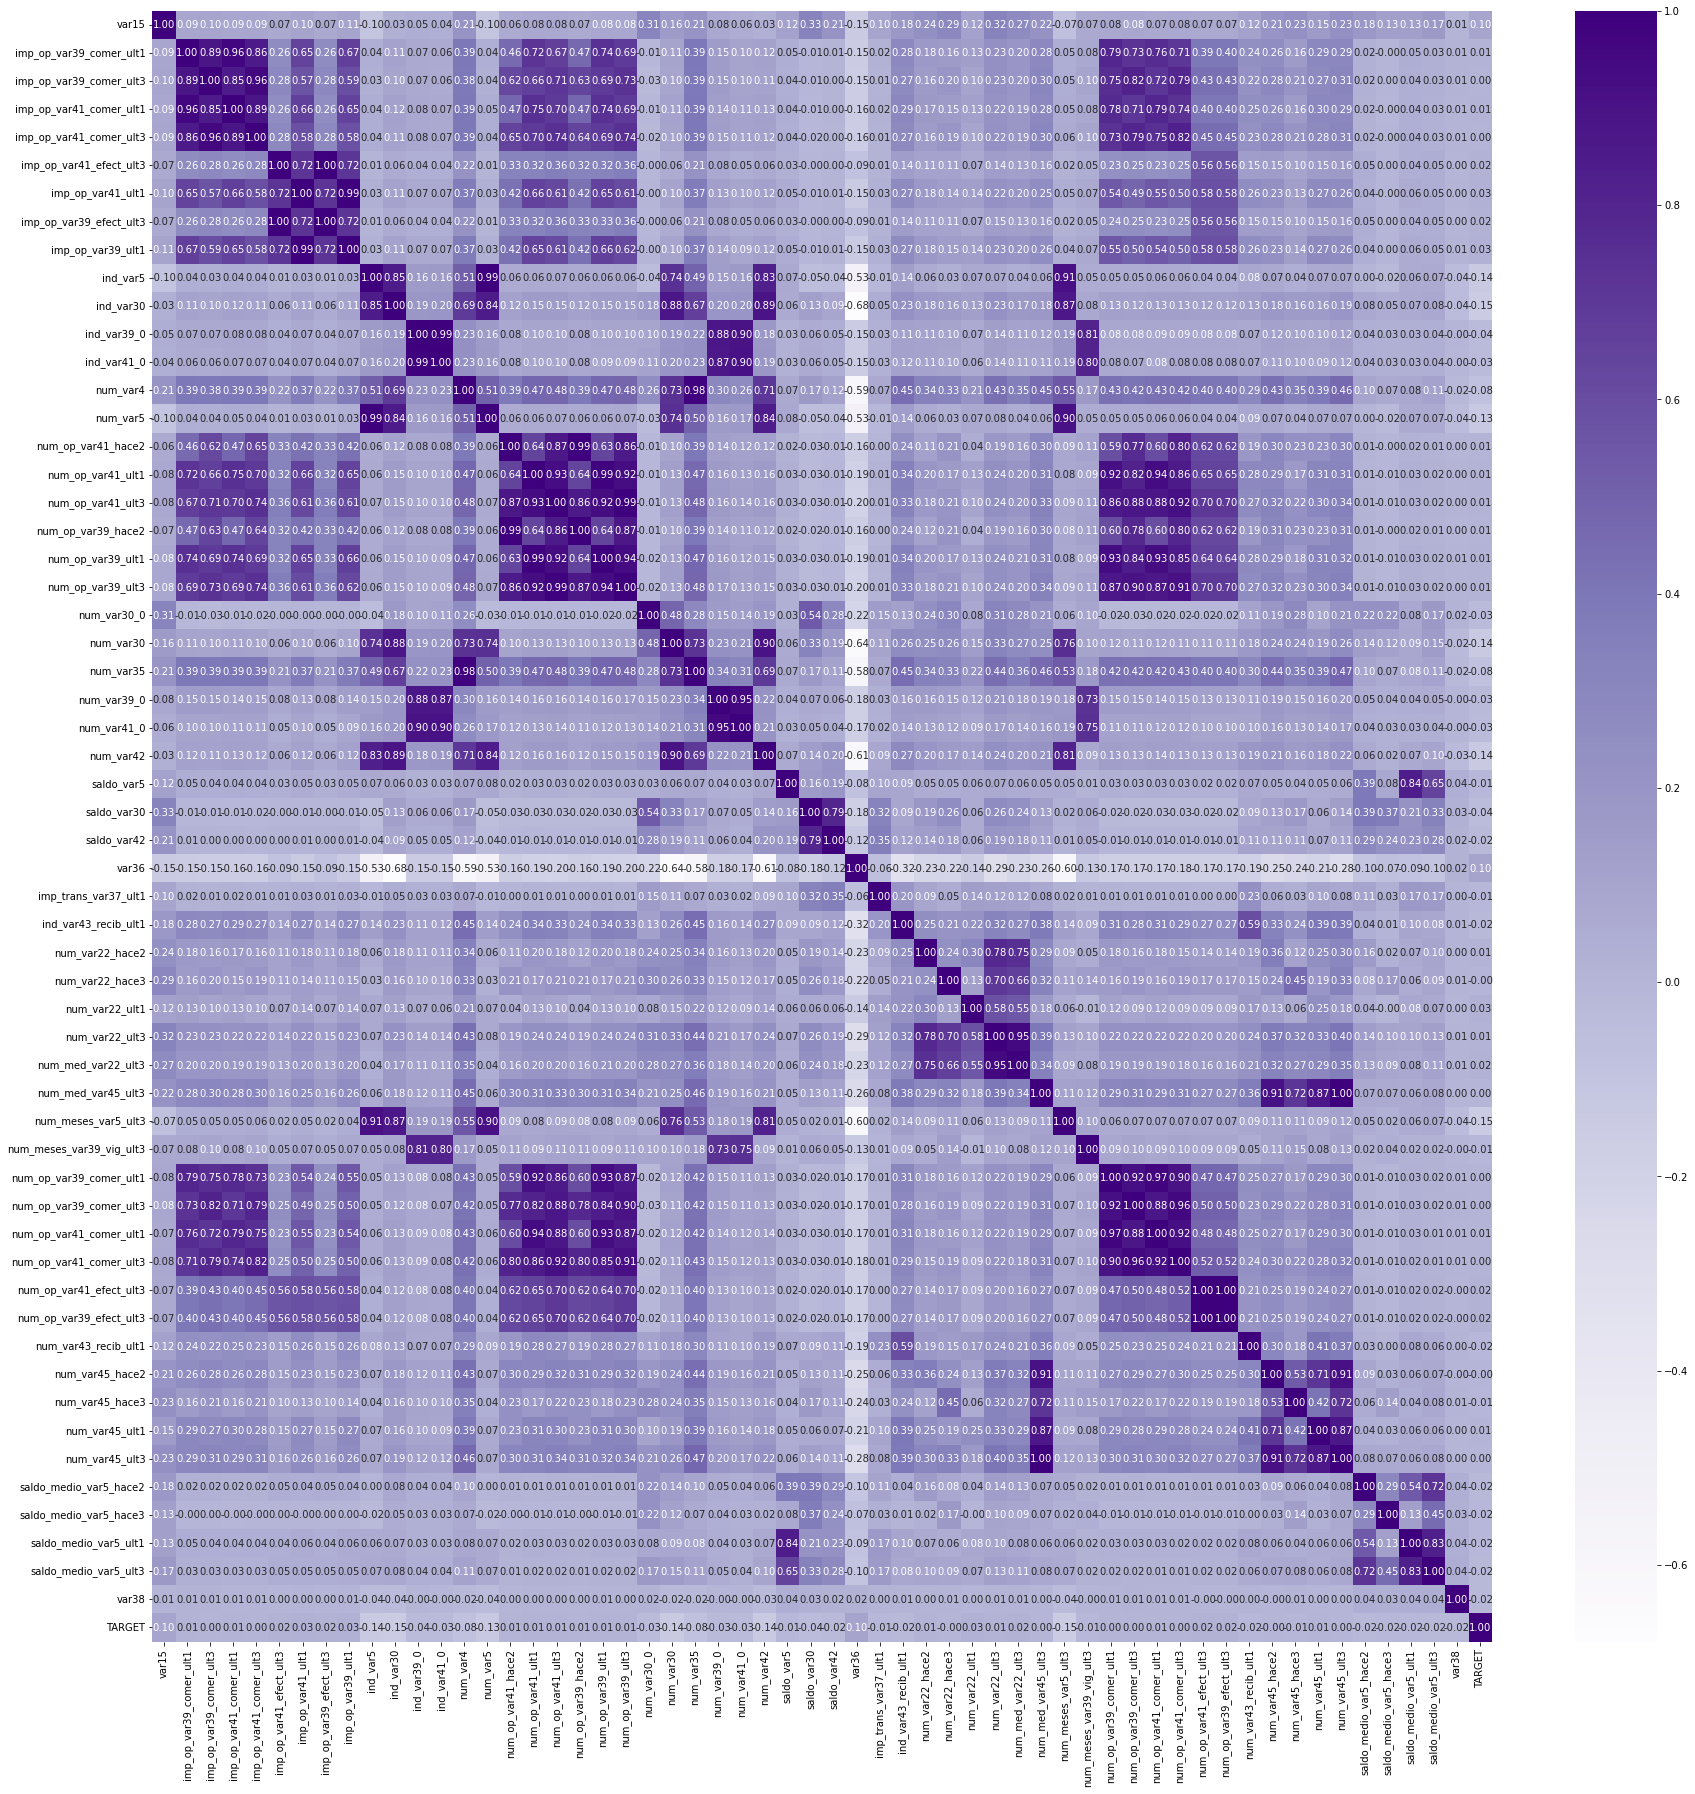

In [20]:
# Checando correlação entre as variáveis
# Mapa de correlação
plt.figure(figsize = (30, 30))
sns.heatmap(df_train_new.iloc[:,1:].corr(), cmap = 'Purples', annot = True, fmt = '.2f');

In [27]:
df_corr = df_train_new.iloc[:,1:].corr()

# Dataset 1: variáveis com correlação maior que 0.01
th_cor = 0.01

allcols_cor_names = list((df_corr.iloc[-1,:] > th_cor).index)
allcols_cor_bool = list(df_corr.iloc[-1,:] > th_cor)

cols_cor = [x for i,x in enumerate(allcols_cor_names) if allcols_cor_bool[i]==True]

df_train_cor = df_train_new[cols_cor]
df_test_cor = df_test_new[cols_cor[:-1]]

df_train_cor.head()

,var15,imp_op_var39_comer_ult1,imp_op_var41_comer_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_ult1,num_op_var39_ult3,var36,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_op_var41_efect_ult3,num_op_var39_efect_ult3,TARGET
0,23,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0,0
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,0,0,0,0,0
2,23,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0,0
3,37,195.0,195.0,0.0,195.0,0.0,195.0,9,9,9,9,2,0,3,0,0,0,0
4,39,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,6,9,3,0,0,0


In [30]:
df_train_cor.shape

(76020, 18)

In [28]:
# Saving the results
df_train_cor.to_csv("santander-customer-satisfaction/train_cor.csv")
df_test_cor.to_csv("santander-customer-satisfaction/test_cor.csv")

## PCA

In [80]:
df_train_new.head()

,ID,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,...,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38,TARGET
0,1,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.00,0.00,39205.170000,0
1,3,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,88.89,0.00,0.00,49278.030000,0
2,4,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.18,3.00,2.07,67333.770000,0
3,8,37,195.0,195.0,195.0,195.0,0.0,195.0,0.0,195.0,...,27,3,18,48,186.09,0.00,91.56,138.84,64007.970000,0
4,10,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.30,40501.08,13501.47,117310.979016,0


In [81]:
# Removing the ID col and splitting the train features/target feature
df_train_pca_x = df_train_new.drop(['ID', 'TARGET'], axis = 1)
df_test_pca_x = df_test_new.drop(['ID'], axis = 1)

df_train_pca_x.head()

,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var5,...,num_var43_recib_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38
0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,39205.170000
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0.00,88.89,0.00,0.00,49278.030000
2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,3.00,0.18,3.00,2.07,67333.770000
3,37,195.0,195.0,195.0,195.0,0.0,195.0,0.0,195.0,1,...,0,27,3,18,48,186.09,0.00,91.56,138.84,64007.970000
4,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,6,0,0,0,0,3.00,0.30,40501.08,13501.47,117310.979016


In [82]:
# Creating the PCA model
pca = PCA(n_components = 15)

df_train_pca = pd.DataFrame(pca.fit_transform(df_train_pca_x))
df_test_pca = pd.DataFrame(pca.transform(df_test_pca_x))

In [83]:
print(df_train_pca.shape)
print(df_test_pca.shape)

(76020, 15)
(75818, 15)


In [84]:
df_train_pca['TARGET'] = df_train_new['TARGET']

In [85]:
pd.DataFrame(df_train_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,TARGET
0,-78243.981052,-14506.758159,1853.137533,-1117.504156,-812.110166,258.108429,-34.733888,72.030873,2.195500,-284.672623,129.277629,-8.535486,1.316429,3.129786,-55.391141,0
1,-68168.437300,-14401.294173,1701.150289,-1062.377743,-863.762581,294.241917,13.024327,61.703316,16.340579,-283.878674,129.194277,-8.502555,1.205129,2.158480,31.601497,0
2,-50118.180272,-14885.617979,1916.950008,-1129.567618,-909.280373,250.753965,-50.004765,76.777907,-1.125582,-285.322429,130.521275,-8.897238,1.308681,2.894650,-54.842903,0
3,-53441.269669,-14726.475283,1907.991042,-1131.994462,-666.543086,274.630585,-126.153277,97.967883,-36.261527,-23.318727,-260.513877,-37.586011,83.816972,-7.364651,52.801261,0
4,2644.922114,206992.481421,148727.340394,197381.895624,150.141205,-2066.774930,8582.830129,20310.188603,14393.080864,-496.316980,399.957002,148.158480,2.665598,0.857191,8.097398,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,-56524.884619,-14802.848326,1902.211664,-1126.427124,-891.178572,253.063047,-46.332393,75.853203,-0.485787,-285.133319,130.213413,-8.815576,1.269704,2.996221,-54.458107,0
76016,2049.646001,50932.517216,7203.872752,-14047.110367,-5718.705744,-1796.419411,-253.500528,609.611333,-151.084863,-255.564752,127.430371,-8.482411,0.496284,-0.319921,53.033344,0
76017,-43424.484005,-14976.845147,1932.076897,-1132.285215,-933.270837,249.179611,-53.591703,78.441792,-2.670127,-285.480909,130.808753,-8.986970,1.306217,2.840260,-54.803139,0
76018,-33175.520950,-15116.506239,1955.085745,-1136.505824,-970.525881,248.078977,-58.114975,79.761878,-3.302956,-285.696588,131.266739,-9.116838,1.300387,2.760257,-54.641921,0


In [86]:
# Saving the results
df_train_pca.to_csv("santander-customer-satisfaction/train_pca.csv")
df_test_pca.to_csv("santander-customer-satisfaction/test_pca.csv")

# Tratamento de dados: Classes desbalanceadas 

## Up/downsampling
talvez não seja uma boa opção pela pouca presença de variáveis com target = 1

### Dataset Correlação

In [87]:
df_train_cor = pd.read_csv("santander-customer-satisfaction/train_cor.csv")
df_test_cor =pd.read_csv("santander-customer-satisfaction/test_cor.csv")

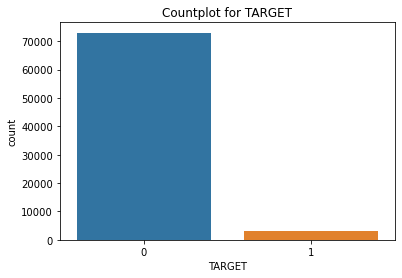

In [88]:
sns.countplot(data = df_train_cor, x = df_train_cor['TARGET'])
plt.title("Countplot for TARGET");

In [93]:
# Separando o dataset de treino em variável target e variáveis preditoras
df_train_cor_x = df_train_cor.drop(['TARGET'], axis = 1)
df_train_cor_y = df_train_cor['TARGET']

Nota-se que há um grande desbalanceamento entre as classes, sendo necessário algum tipo de downsampling ou upsampling para compensar esse deficit

Usaremos o modelo SMOTETomek de up/downsampling

In [94]:
# Criando o modelo SMOTETomek
smote_tomek = SMOTETomek()
df_train_cor_resampled_x, df_train_cor_resampled_y = smote_tomek.fit_resample(df_train_cor_x, df_train_cor_y)

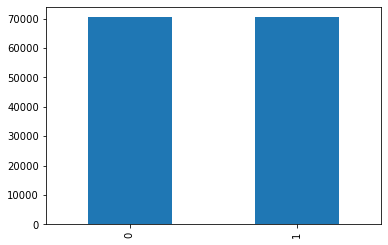

In [120]:
df_train_cor_resampled_y.value_counts().plot(kind = 'bar');

In [115]:
df_train_cor_resampled_x

,Unnamed: 0,var15,imp_op_var39_comer_ult1,imp_op_var41_comer_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_ult1,num_op_var39_ult3,var36,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_op_var41_efect_ult3,num_op_var39_efect_ult3
0,0,23,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0
1,1,34,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,0,0,0,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0
3,3,37,195.0,195.0,0.0,195.0,0.0,195.0,9,9,9,9,2,0,3,0,0,0
4,4,39,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,6,9,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140841,11906,46,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,7,7,2,0,0
140842,4081,35,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,29,0,8,2,0,0
140843,40081,51,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0
140844,26176,25,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0


In [109]:
print(len(df_train_cor_resampled_y[df_train_cor_resampled_y[:] == 0]))
print(len(df_train_cor_resampled_y[df_train_cor_resampled_y[:] == 1]))

70423
70423


In [131]:
# Saving the results
df_train_cor_resampled_x.to_csv("santander-customer-satisfaction/train_cor_resamp_x.csv")
df_train_cor_resampled_y.to_csv("santander-customer-satisfaction/train_cor_resamp_y.csv")

### Dataset PCA

In [106]:
# Separando o dataset de treino em variável target e variáveis preditoras
df_train_pca_x = df_train_pca.drop(['TARGET'], axis = 1)
df_train_pca_y = df_train_pca['TARGET']

In [107]:
# Criando o modelo SMOTETomek
smote_tomek_pca = SMOTETomek()
df_train_pca_resampled_x, df_train_pca_resampled_y = smote_tomek_pca.fit_resample(df_train_pca_x, df_train_pca_y)

In [108]:
print(len(df_train_pca_resampled_y[df_train_pca_resampled_y[:] == 0]))
print(len(df_train_pca_resampled_y[df_train_pca_resampled_y[:] == 1]))

68678
68678


In [133]:
df_train_pca_resampled_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-78243.981052,-14506.758159,1853.137533,-1117.504156,-812.110166,258.108429,-34.733888,72.030873,2.195500,-284.672623,129.277629,-8.535486,1.316429,3.129786,-55.391141
1,-68168.437300,-14401.294173,1701.150289,-1062.377743,-863.762581,294.241917,13.024327,61.703316,16.340579,-283.878674,129.194277,-8.502555,1.205129,2.158480,31.601497
2,-50118.180272,-14885.617979,1916.950008,-1129.567618,-909.280373,250.753965,-50.004765,76.777907,-1.125582,-285.322429,130.521275,-8.897238,1.308681,2.894650,-54.842903
3,-53441.269669,-14726.475283,1907.991042,-1131.994462,-666.543086,274.630585,-126.153277,97.967883,-36.261527,-23.318727,-260.513877,-37.586011,83.816972,-7.364651,52.801261
4,2644.922114,206992.481421,148727.340394,197381.895624,150.141205,-2066.774930,8582.830129,20310.188603,14393.080864,-496.316980,399.957002,148.158480,2.665598,0.857191,8.097398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137351,-66060.786423,-14669.196515,1880.815572,-1122.896566,-852.180822,255.024602,-41.136416,74.002278,0.788563,-284.659783,129.323352,-8.603705,1.205941,2.318227,14.064566
137352,-146.167605,-15571.446260,2029.603309,-1149.591910,-1096.428839,239.968367,-76.439815,85.778679,-7.444935,-286.378945,132.699770,-9.545393,1.249492,2.541477,-53.935831
137353,-40437.882708,-15018.883463,1938.746837,-1133.395499,-946.014727,248.680753,-55.139488,78.527659,-2.352610,-285.254366,130.503567,-8.945854,1.209853,2.180587,7.576581
137354,-31639.882330,-15142.100369,1958.441919,-1136.652290,-981.774682,247.283681,-59.621432,80.234871,-3.557220,-285.690940,131.319220,-9.136572,1.278568,2.775185,-54.503309


In [132]:
# Saving the results
df_train_pca_resampled_x.to_csv("santander-customer-satisfaction/train_pca_resamp_x.csv")
df_train_pca_resampled_y.to_csv("santander-customer-satisfaction/train_pca_resamp_y.csv")

# Prediction Models

## Dataset: Correlation

In [18]:
train_cor_x = pd.read_csv("santander-customer-satisfaction/train_cor_resamp_x.csv").drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)
train_cor_y = pd.read_csv("santander-customer-satisfaction/train_cor_resamp_y.csv").drop(['Unnamed: 0'], axis = 1)

train_cor_x.head()

,var15,imp_op_var39_comer_ult1,imp_op_var41_comer_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_ult1,num_op_var39_ult3,var36,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_op_var41_efect_ult3,num_op_var39_efect_ult3
0,23,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,0,0,0,0
2,23,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0
3,37,195.0,195.0,0.0,195.0,0.0,195.0,9,9,9,9,2,0,3,0,0,0
4,39,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,6,9,3,0,0


In [19]:
train_cor_x.nunique()

var15                        100
imp_op_var39_comer_ult1    17133
imp_op_var41_comer_ult1    16999
imp_op_var41_efect_ult3     9884
imp_op_var41_ult1          18552
imp_op_var39_efect_ult3     9891
imp_op_var39_ult1          18697
num_op_var41_ult1            166
num_op_var41_ult3            223
num_op_var39_ult1            169
num_op_var39_ult3            226
var36                        100
num_var22_ult1                44
num_var22_ult3                89
num_med_var22_ult3            34
num_op_var41_efect_ult3      103
num_op_var39_efect_ult3      101
dtype: int64

In [70]:
# Normalizing data
from sklearn.preprocessing import StandardScaler

# Gerando o novo padrão
norm_cor = StandardScaler().fit(train_cor_x)

train_cor_norm_x = pd.DataFrame(norm_cor.transform(train_cor_x))
train_cor_norm_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.091249,-0.208571,-0.210223,-0.166406,-0.216910,-0.16609,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,0.978245,-0.279732,-0.484460,-0.346125,-0.24691,-0.246506
1,-0.172144,-0.208571,-0.210223,-0.166406,-0.216910,-0.16609,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,-1.082092,-0.279732,-0.484460,-0.346125,-0.24691,-0.246506
2,-1.091249,-0.208571,-0.210223,-0.166406,-0.216910,-0.16609,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,0.978245,-0.279732,-0.484460,-0.346125,-0.24691,-0.246506
3,0.078521,0.329957,0.361722,-0.166406,0.024383,-0.16609,0.019755,0.545615,0.260018,0.529808,0.251679,-1.103553,-0.279732,-0.001691,-0.346125,-0.24691,-0.246506
4,0.245631,-0.208571,-0.210223,-0.166406,-0.216910,-0.16609,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,-1.125015,2.427458,0.963847,1.311806,-0.24691,-0.246506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140841,0.830516,-0.208571,-0.210223,-0.166406,-0.216910,-0.16609,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,0.978245,2.878657,0.642001,0.759162,-0.24691,-0.246506
140842,-0.088589,-0.208571,-0.210223,-0.166406,-0.216910,-0.16609,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,-0.524084,-0.279732,0.802924,0.759162,-0.24691,-0.246506
140843,1.248291,-0.208571,-0.210223,-0.166406,-0.216910,-0.16609,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,0.978245,-0.279732,-0.484460,-0.346125,-0.24691,-0.246506
140844,-0.924139,-0.208571,-0.210223,-0.166406,-0.216910,-0.16609,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,0.978245,-0.279732,-0.484460,-0.346125,-0.24691,-0.246506


### Logistic Regression

In [37]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
LR_cor = LogisticRegression(max_iter = 300)

# Cross Validation
LR_results = cross_val_score(LR_cor, train_cor_norm_x, train_cor_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (LR_results.mean() * 100))

Acurácia: 65.335


### LinearDiscriminantAnalysis

In [43]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
LDA_cor = LinearDiscriminantAnalysis()

# Cross Validation
LDA_results = cross_val_score(LDA_cor, train_cor_norm_x, train_cor_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (LDA_results.mean() * 100))

Acurácia: 65.382


### KNN

In [44]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
KNC_cor = KNeighborsClassifier()

# Cross Validation
KNC_results = cross_val_score(KNC_cor, train_cor_norm_x, train_cor_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (KNC_results.mean() * 100))

Acurácia: 86.250


### Naive Bayes

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
NB_cor = GaussianNB()

# Cross Validation
NB_results = cross_val_score(NB_cor, train_cor_norm_x, train_cor_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (NB_results.mean() * 100))

Acurácia: 61.583


## Dataset: PCA

In [74]:
train_pca_x = pd.read_csv("santander-customer-satisfaction/train_pca_resamp_x.csv").drop(['Unnamed: 0'], axis = 1)
train_pca_y = pd.read_csv("santander-customer-satisfaction/train_pca_resamp_y.csv").drop(['Unnamed: 0'], axis = 1)

train_pca_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-78243.981052,-14506.758159,1853.137533,-1117.504156,-812.110166,258.108429,-34.733888,72.030873,2.195500,-284.672623,129.277629,-8.535486,1.316429,3.129786,-55.391141
1,-68168.437300,-14401.294173,1701.150289,-1062.377743,-863.762581,294.241917,13.024327,61.703316,16.340579,-283.878674,129.194277,-8.502555,1.205129,2.158480,31.601497
2,-50118.180272,-14885.617979,1916.950008,-1129.567618,-909.280373,250.753965,-50.004765,76.777907,-1.125582,-285.322429,130.521275,-8.897238,1.308681,2.894650,-54.842903
3,-53441.269669,-14726.475283,1907.991042,-1131.994462,-666.543086,274.630585,-126.153277,97.967883,-36.261527,-23.318727,-260.513877,-37.586011,83.816972,-7.364651,52.801261
4,2644.922114,206992.481421,148727.340394,197381.895624,150.141205,-2066.774930,8582.830129,20310.188603,14393.080864,-496.316980,399.957002,148.158480,2.665598,0.857191,8.097398


In [75]:
# Normalizing data
from sklearn.preprocessing import StandardScaler

norm_pca = StandardScaler().fit(train_pca_x)

# Gerando o novo padrão
train_pca_norm_x = pd.DataFrame(norm_pca.transform(train_pca_x))
train_pca_norm_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.469200,-0.146823,0.053071,-0.042172,-0.044339,0.028541,-0.000305,0.014592,0.007334,-0.212684,0.145685,0.028829,0.004525,0.024237,-0.986755
1,-0.399810,-0.145046,0.045378,-0.039043,-0.048466,0.033546,0.007162,0.011388,0.015428,-0.212215,0.145581,0.028911,0.003783,0.015437,0.875461
2,-0.275500,-0.153206,0.056301,-0.042857,-0.052102,0.027522,-0.002693,0.016065,0.005433,-0.213067,0.147227,0.027918,0.004473,0.022106,-0.975019
3,-0.298386,-0.150525,0.055848,-0.042995,-0.032708,0.030830,-0.014599,0.022641,-0.014673,-0.058338,-0.337661,-0.044279,0.554629,-0.070844,1.329276
4,0.087874,3.584980,7.487250,11.227398,0.032541,-0.293481,1.347092,6.294512,8.242366,-0.337673,0.481330,0.423159,0.013521,0.003647,0.372318


### Logistic Regression

In [54]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
LR_pca = LogisticRegression(max_iter = 300)

# Cross Validation
LR_results_pca = cross_val_score(LR_pca, train_pca_norm_x, train_pca_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (LR_results_pca.mean() * 100))

Acurácia: 67.123


### LineadDiscriminantAnalysis

In [55]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
LDA_pca = LinearDiscriminantAnalysis()

# Cross Validation
LDA_results_pca = cross_val_score(LDA_pca, train_pca_norm_x, train_pca_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (LDA_results_pca.mean() * 100))

Acurácia: 66.095


### KNN

In [61]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
KNC_pca = KNeighborsClassifier()

# Cross Validation
KNC_results_pca = cross_val_score(KNC_pca, train_pca_norm_x, train_pca_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (KNC_results_pca.mean() * 100))

Acurácia: 84.063


### Naive Bayes

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
NB_pca = GaussianNB()

# Cross Validation
NB_results_pca = cross_val_score(NB_cor, train_pca_norm_x, train_pca_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (NB_results_pca.mean() * 100))

Acurácia: 53.891


# Predictions: test dataset

## Correlation Models

### KNN

In [67]:
test_cor = pd.read_csv('santander-customer-satisfaction/test_cor.csv').drop(['Unnamed: 0'], axis = 1)
test_cor

,var15,imp_op_var39_comer_ult1,imp_op_var41_comer_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_ult1,num_op_var39_ult3,var36,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_op_var41_efect_ult3,num_op_var39_efect_ult3
0,32,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,3,0,0,0
1,35,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,3,0,0,0
2,23,0.0,0.0,60.0,60.0,60.0,60.0,3,3,3,3,3,0,0,0,3,3
3,24,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0
4,23,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,23,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0
75814,26,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,0,0,0,0
75815,24,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0
75816,40,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,0,0,0,0


In [78]:
# Normalizing the data

test_cor_norm = pd.DataFrame(norm_cor.transform(test_cor))
test_cor_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.339254,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,-1.082092,-0.279732,-0.001691,-0.346125,-0.246910,-0.246506
1,-0.088589,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,-1.082092,-0.279732,-0.001691,-0.346125,-0.246910,-0.246506
2,-1.091249,-0.208571,-0.210223,-0.101208,-0.142666,-0.101851,-0.144424,0.002429,-0.100119,-0.002698,-0.102749,-1.082092,-0.279732,-0.484460,-0.346125,0.299704,0.294955
3,-1.007694,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,0.978245,-0.279732,-0.484460,-0.346125,-0.246910,-0.246506
4,-1.091249,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,-1.082092,-0.279732,-0.484460,-0.346125,-0.246910,-0.246506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,-1.091249,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,0.978245,-0.279732,-0.484460,-0.346125,-0.246910,-0.246506
75814,-0.840584,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,-1.082092,-0.279732,-0.484460,-0.346125,-0.246910,-0.246506
75815,-1.007694,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,0.978245,-0.279732,-0.484460,-0.346125,-0.246910,-0.246506
75816,0.329186,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,-1.082092,-0.279732,-0.484460,-0.346125,-0.246910,-0.246506


In [89]:
KNN_cor = KNC_cor.fit(train_cor_norm_x, train_cor_y['TARGET'])

In [90]:
predictions_KNN_cor = KNN_cor.predict(test_cor_norm)

In [93]:
pd.DataFrame(predictions_KNN_cor).value_counts()

0    61653
1    14165
dtype: int64

In [112]:
test_sub = pd.DataFrame(pd.read_csv('santander-customer-satisfaction/test.csv')['ID'])
test_sub['TARGET'] = predictions_KNN_cor

test_sub

,TARGET
ID,
2,0
5,0
6,0
7,0
9,0
...,...
151831,0
151832,0
151833,0


In [115]:
# Saving the results
test_sub.to_csv("santander-customer-satisfaction/results_cor.csv")

## PCA Models

### KNN

In [117]:
test_pca = pd.read_csv('santander-customer-satisfaction/test_pca.csv').drop(['Unnamed: 0'], axis = 1)
test_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-76917.021727,-14515.577792,1856.449112,-1119.024808,-805.908994,257.817513,-34.699490,71.831597,2.241370,-284.381880,128.732044,-8.445186,1.191545,2.228163,31.801767
1,-71962.988396,-14587.669498,1867.353760,-1120.547421,-829.074159,257.734221,-36.910660,72.918382,1.446100,-284.424356,128.882639,-8.476168,1.127796,2.168923,34.409243
2,-70454.789517,-14558.824958,1864.511229,-1121.298106,-717.134298,310.866487,-44.777305,80.776635,-1.274425,-171.827728,146.074582,-43.074133,-7.140333,1.723042,35.666066
3,70434.237405,-16533.653945,2189.086645,-1178.592964,-1353.382814,223.576158,-114.131175,98.205918,-16.156635,-287.960917,135.838375,-10.460279,1.270122,1.923002,-54.142943
4,-43802.139896,-14930.446628,1933.358052,-1136.691071,-884.704310,243.543943,-54.398442,75.995386,-0.591626,-285.365702,130.261910,-8.856175,1.201605,1.937000,31.636174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,-77206.057309,-14520.907449,1855.482541,-1117.930244,-815.888320,257.867806,-35.287312,72.212699,2.067659,-284.660104,129.264364,-8.513038,1.258415,3.096365,-52.877512
75814,29501.200446,-15970.982688,2096.745295,-1162.257982,-1198.838403,233.099140,-91.890629,90.772654,-10.991950,-286.713362,133.432049,-9.827516,1.173309,1.350394,32.338524
75815,49839.972936,-16114.403230,2148.129463,-1185.001449,-1115.167140,222.782897,-96.473614,88.392206,-10.278291,-288.421297,135.126650,-10.124137,1.283311,2.069628,-54.028927
75816,-146.083569,-15566.769699,2029.691460,-1150.065333,-1090.710133,240.520824,-75.659393,85.564873,-7.386890,-286.047089,132.110512,-9.443321,1.159760,1.615398,32.518486


In [118]:
# Normalizing the data

test_pca_norm = pd.DataFrame(norm_pca.transform(test_pca))
test_pca_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.460061,-0.146971,0.053239,-0.042259,-0.043843,0.028501,-0.000300,0.014530,0.007360,-0.212512,0.145008,0.029056,0.003692,0.016068,0.879748
1,-0.425943,-0.148186,0.053791,-0.042345,-0.045694,0.028489,-0.000646,0.014868,0.006905,-0.212537,0.145195,0.028978,0.003267,0.015531,0.935565
2,-0.415556,-0.147700,0.053647,-0.042388,-0.036751,0.035849,-0.001876,0.017306,0.005348,-0.146042,0.166513,-0.058090,-0.051864,0.011491,0.962469
3,0.554733,-0.180972,0.070076,-0.045641,-0.087584,0.023758,-0.012719,0.022714,-0.003168,-0.214626,0.153820,0.023985,0.004216,0.013303,-0.960035
4,-0.232002,-0.153961,0.057132,-0.043262,-0.050139,0.026524,-0.003380,0.015823,0.005739,-0.213093,0.146905,0.028022,0.003759,0.013430,0.876203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,-0.462052,-0.147061,0.053190,-0.042197,-0.044641,0.028508,-0.000392,0.014649,0.007260,-0.212676,0.145668,0.028885,0.004138,0.023934,-0.932947
75814,0.272831,-0.171492,0.065402,-0.044713,-0.075237,0.025077,-0.009242,0.020408,-0.000213,-0.213889,0.150836,0.025577,0.003571,0.008115,0.891238
75815,0.412902,-0.173908,0.068003,-0.046005,-0.068552,0.023648,-0.009959,0.019669,0.000196,-0.214897,0.152938,0.024831,0.004304,0.014632,-0.957595
75816,0.068653,-0.164682,0.062008,-0.044021,-0.066598,0.026105,-0.006704,0.018792,0.001850,-0.213495,0.149198,0.026544,0.003480,0.010516,0.895090


In [119]:
KNN_pca = KNC_pca.fit(train_pca_norm_x, train_pca_y['TARGET'])

predictions_KNN_pca = KNN_pca.predict(test_pca_norm)

In [120]:
pd.DataFrame(predictions_KNN_pca).value_counts()

0    59957
1    15861
dtype: int64

In [123]:
test_sub_pca = pd.DataFrame(pd.read_csv('santander-customer-satisfaction/test.csv')['ID']).set_index('ID')
test_sub_pca['TARGET'] = predictions_KNN_pca

test_sub_pca

,TARGET
ID,
2,0
5,0
6,0
7,0
9,0
...,...
151831,1
151832,0
151833,0


In [124]:
# Saving the results
test_sub_pca.to_csv("santander-customer-satisfaction/results_pca.csv")